In [3]:
import numpy as np
#import matplotlib.pyplot as plt
import sys
caffe_root = '/home/anojan/workspace/caffe_install/caffe-segnet-cudnn5/'
sys.path.insert(0,'/home/anojan/anaconda2/envs/env/lib/python2.7/site-packages/')
sys.path.insert(0,caffe_root + 'python')
import caffe
from skimage.io import imread
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import data
from skimage import novice
import random
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_float
import os.path
import json
import scipy
import argparse
import math
import pylab
from sklearn.preprocessing import normalize
from caffe.proto import caffe_pb2
from __future__ import division
# Import arguments

model = '/home/anojan/us_project/models/segnet_inference.prototxt';

weights= '/home/anojan/us_project/caffemodels_iter_7000.caffemodel';
iterations= 450;

caffe.set_mode_gpu()
caffe.set_device(0)

net = caffe.Net(model,weights,caffe.TEST)

train_img ={};
train_lab ={};

#file_seg = open('../data/Training/images.txt', 'r') ;
#file_img = open('../data/Training/labels.txt', 'r') ;


file_seg = open('../us_data/labels.txt', 'r') ;
file_img = open('../us_data/images.txt', 'r') ;

idx = 0;
for line in file_img:
    train_img[idx] = line[0:-1];
    #print (train_img[idx]);
    idx = idx + 1;
    
idx = 0;
for line in file_seg:
    train_lab[idx] = line[0:-1];
    #print (train_lab[idx]);
    idx = idx + 1;
    
    
    
    
train_img = [ v for v in train_img.values() ];
train_lab = [ v for v in train_lab.values() ];

batch_size=3
sample = len(train_img);
random.shuffle(range(sample));
dice_total=0;
ite_total = sample/batch_size;

ite_idx=-1
for i in range(0, int(ite_total)):
    for batch_idx in xrange(batch_size):
        ite_idx=ite_idx+1;
        img0 = imread(train_img[ite_idx]).transpose();
        print train_img[ite_idx]
         
        
        net.blobs['data'].data[batch_idx] = img0;
       
        lab = imread(train_lab[ite_idx]);
        print train_lab[ite_idx]
        #lab1=lab
        #(512,512) image reshaped to (1,512,512)
        lab2 = cv2.threshold(lab, 127, 1, cv2.THRESH_BINARY)[1]
        #net.blobs['labels'].data[0][0] = lab2;
    
        net.forward()

        image = net.blobs['data'].data
        #label = net.blobs['labels'].data
        predicted = net.blobs['prob'].data
        image = np.squeeze(image[0,:,:,:])
        output = np.squeeze(predicted[0,:,:,:])
        ind = np.argmax(output, axis=0)
            
    ###plt.figure()
    ###plt.imshow(ind)
    #plt.figure()
    #plt.imshow(rgb_gt,vmin=0, vmax=1)
    #plt.figure()
    #plt.imshow(rgb,vmin=0, vmax=1)
    ###plt.show()
    
    ###plt.figure()
    ###plt.imshow(lab2)
    #plt.figure()
    #plt.imshow(rgb_gt,vmin=0, vmax=1)
    #plt.figure()
    #plt.imshow(rgb,vmin=0, vmax=1)
    ###plt.show()
        print 
        mod_lab=0;
    
        for i in range (0,560):
            for j in range (0,360):
                if lab2 [j,i]==1:
                    mod_lab=mod_lab+1
        print mod_lab
        mod_ind=0
        for i in range (0,560):
            for j in range (0,360):
                if ind [i,j]==1:
                    mod_ind=mod_ind+1
        print mod_ind

        mod_union=0
        for i in range (0,560):
            for j in range (0,360):
                if ( ind [i,j]==1 and lab2[j,i]==1): 
                    mod_union=mod_union+1
        print mod_union

        m=(2*mod_union)
        print 'm '+str(m)
   
        d=(mod_lab+mod_ind)
        print 'd '+str(d)
        dice=m/d*100
        print 'dice='+ str(dice)+'%'
        dice_total=dice_total+dice
    
print 'Success!'
print 'dice_total='+ str(dice_total)+'%'

/home/anojan/us_project/us_data/images/106_1.jpg
/home/anojan/us_project/us_data/groundtruth/106_1_gt.png

8866
0
0
m 0
d 8866
dice=0.0%
/home/anojan/us_project/us_data/images/106_2.jpg
/home/anojan/us_project/us_data/groundtruth/106_2_gt.png

2201
0
0
m 0
d 2201
dice=0.0%
/home/anojan/us_project/us_data/images/106_3.jpg
/home/anojan/us_project/us_data/groundtruth/106_3_gt.png

2881
0
0
m 0
d 2881
dice=0.0%
/home/anojan/us_project/us_data/images/106_4.jpg
/home/anojan/us_project/us_data/groundtruth/106_4_gt.png

2303
0
0
m 0
d 2303
dice=0.0%
/home/anojan/us_project/us_data/images/107_1.jpg
/home/anojan/us_project/us_data/groundtruth/107_1_gt.png

4986
0
0
m 0
d 4986
dice=0.0%
/home/anojan/us_project/us_data/images/108_1.jpg
/home/anojan/us_project/us_data/groundtruth/108_1_gt.png

6358
0
0
m 0
d 6358
dice=0.0%
/home/anojan/us_project/us_data/images/109_1.jpg
/home/anojan/us_project/us_data/groundtruth/109_1_gt.png

5669
0
0
m 0
d 5669
dice=0.0%
/home/anojan/us_project/us_data/images/10

KeyboardInterrupt: 

In [1]:
lab2[359,1]

NameError: name 'lab2' is not defined

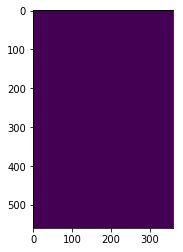

In [33]:
plt.figure()
plt.imshow(ind)
    #plt.figure()
    #plt.imshow(rgb_gt,vmin=0, vmax=1)
    #plt.figure()
    #plt.imshow(rgb,vmin=0, vmax=1)
plt.show()

In [27]:
output.shape

(2, 560, 360)